In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [94]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [95]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

Drop the text columns as it will not help us

In [96]:
del df['Ad Topic Line']
del df['City']
del df['Country']
del df['Timestamp']
del df['Male']

In [97]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


Train/Test split and scaling data

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [99]:
X = df.drop('Clicked on Ad',axis=1)
y = df['Clicked on Ad']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Let us use standard scaler

In [101]:
# use StandardScaler to scale the features
scaler = StandardScaler()

# fit scaler to training data only
scaler.fit(X_train)

# transform training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

** Train and fit a KNN model on the scaled training set.**

In [102]:
# create a KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=14)

# fit the model to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

## Predictions and Evaluations
** Now predict values for the testing data.**

** Create a classification report for the model.**

In [103]:
# make predictions on the testing data
y_pred = knn.predict(X_test)

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       146
           1       0.99      0.92      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



Test for best K value to see if any improvement can be gotten

Use elbow method to find best K value

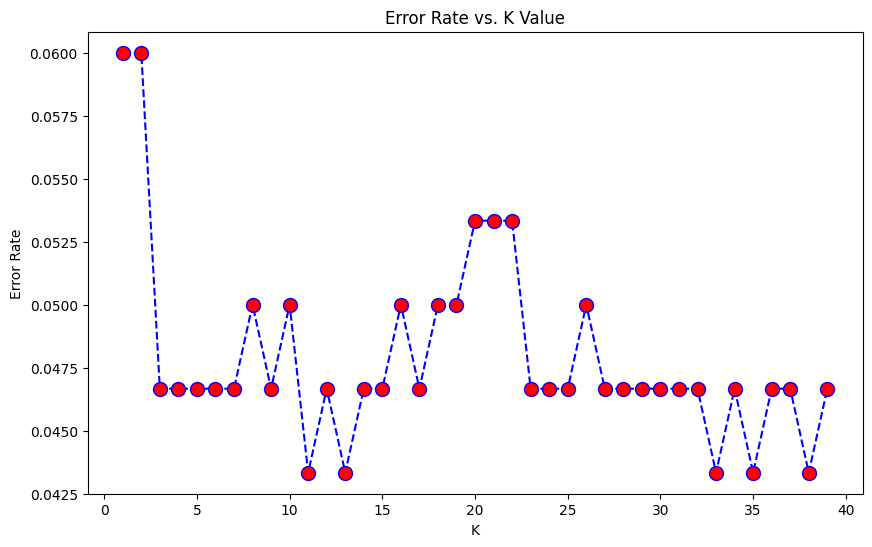

In [106]:
# use elbow method to pick a good K value
error_rate = []
iteration = 40
for i in range(1,iteration):
        
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        y_pred_i = knn.predict(X_test)
        error_rate.append(np.mean(y_pred_i != y_test)) # average of all the errors = misclassification rate

plt.figure(figsize=(10,6))
plt.plot(range(1,iteration),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [107]:
from sklearn.model_selection import train_test_split

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=666) # 50% test, 50% validation in the 30% entire dataset

In [108]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# print the shapes of the new y objects
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(700, 4)
(150, 4)
(150, 4)
(700,)
(150,)
(150,)


In [109]:
# standardize all the data
scaler = StandardScaler()

# fit scaler to training data only
scaler.fit(X_train)

# transform training, validation, and test data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [110]:
# new knn model
knn_val = KNeighborsClassifier(n_neighbors=7)

# fit the model to the training data
knn_val.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [111]:
# make predictions on the testing data with validation data
y_pred_val = knn_val.predict(X_val)

# print the classification report
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        70
           1       1.00      0.91      0.95        80

    accuracy                           0.95       150
   macro avg       0.95      0.96      0.95       150
weighted avg       0.96      0.95      0.95       150



In [112]:
# make predictions on the testing data with test data
y_pred_test = knn_val.predict(X_test)

# print the classification report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        76
           1       0.96      0.95      0.95        74

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



K Cross Validation

In [117]:
# Start from new X and y
X = df.drop('Clicked on Ad',axis=1)
y = df['Clicked on Ad']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=666)

In [118]:
#standardize the data

scaler = StandardScaler()

# fit scaler to training data only
scaler.fit(X_train)

# transform training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
# try ridge regression
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()


In [126]:
from sklearn.model_selection import cross_val_score

# use cross validation to get the best alpha
alpha = []

# establish range of alphas
for i in range(1,100):
    alpha.append(i/10)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for a in alpha:
    ridge = RidgeClassifier(alpha=a)
    scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_scores.append(scores.mean())

# find the best alpha
best_alpha = alpha[cv_scores.index(max(cv_scores))]
print(best_alpha)





0.1
